In [1]:
from langchain_openai import ChatOpenAI

# 모델 초기화
model = ChatOpenAI(model="gpt-4o", temperature=0.01)
model.invoke('안녕하세요!')

AIMessage(content='안녕하세요! 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 10, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8', 'finish_reason': 'stop', 'logprobs': None}, id='run-9d4a1a9c-014b-4d93-9aa2-d8062a85c60d-0', usage_metadata={'input_tokens': 10, 'output_tokens': 11, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [2]:
from typing import Annotated # annotated는 타입 힌트를 사용할 때 사용하는 함수
from typing_extensions import TypedDict # TypedDict는 딕셔너리 타입을 정의할 때 사용하는 함수

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    """
    State 클래스는 TypedDict를 상속받습니다.

    속성:
        messages (Annotated[list[str], add_messages]): 메시지들은 "list" 타입을 가집니다. 
        주석에 있는 'add_messages' 함수는 이 상태 키가 어떻게 업데이트되어야 하는지를 정의합니다.
        (이 경우, 메시지를 덮어쓰는 대신 리스트에 추가합니다)
    """
    messages: Annotated[list[str], add_messages]

# StateGraph 클래스를 사용하여 State 타입의 그래프를 생성합니다.
graph_builder = StateGraph(State) 

In [3]:
from langchain_core.tools import tool
from datetime import datetime
import pytz
from langchain_community.tools import DuckDuckGoSearchResults
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper

import bs4
from langchain_community.document_loaders import WebBaseLoader

# 도구 함수 정의
@tool
def get_current_time(timezone: str, location: str) -> str:
    """현재 시각을 반환하는 함수."""
    try:
        tz = pytz.timezone(timezone)
        now = datetime.now(tz).strftime("%Y-%m-%d %H:%M:%S")
        result = f'{timezone} ({location}) 현재시각 {now}'
        # print(result)
        return result
    except pytz.UnknownTimeZoneError:
        return f"알 수 없는 타임존: {timezone}"
    
@tool
def get_web_search(query: str, search_period: str='m') -> str:
    """
    웹 검색을 수행하는 함수.

    Args:
        query (str): 검색어
        search_period (str): 검색 기간 (e.g., "w" for past week (default), "m" for past month, "y" for past year, "d" for past day)

    Returns:
        str: 검색 결과
    """
    wrapper = DuckDuckGoSearchAPIWrapper(
        # region="kr-kr", 
        time=search_period
    )

    print('\n-------- WEB SEARCH --------')
    print(query)
    print(search_period)

    search = DuckDuckGoSearchResults(
        api_wrapper=wrapper,
        # source="news",
        results_separator=';\n'
    )

    searched = search.invoke(query)
    
    for i, result in enumerate(searched.split(';\n')):
        print(f'{i+1}. {result}')
    
    return searched

# 도구 바인딩
tools = [get_current_time, get_web_search]

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [4]:
tools[0].invoke({"timezone": "Asia/Seoul", "location": "서울"})

'Asia/Seoul (서울) 현재시각 2025-02-26 23:55:35'

In [5]:
tools[1].invoke({"query": "파이썬", "search_period": "m"})


-------- WEB SEARCH --------
파이썬
m
1. snippet: Python Tutorials → In-depth articles and video courses Learning Paths → Guided study plans for accelerated learning Quizzes → Check your learning progress Browse Topics → Focus on a specific area or skill level Community Chat → Learn with other Pythonistas Office Hours → Live Q&A calls with Python experts Podcast → Hear what's new in the world of Python Books →, title: Python Tutorials - Real Python, link: https://realpython.com/
2. snippet: 목차파이썬이 뭐야? 🐍파이썬으로 할 수 있는 것들 🎯파이썬 설치하고 시작하기 🛠️기본 문법 배우기 ️실전 예제: 간단한 프로젝트 만들기 🚀파이썬이 뭐야? 🐍파이썬(Python)은 간결하고 쉬운 문법을 가진 프로그래밍 언어야! 🎉처음 프로그래밍을 배우는 사람도 빠르게 익힐 수 있어서 인기가 ..., title: 파이썬을 배우면 뭐가 좋을까? 초보자를 위한 쉽고 귀여운 입문 가이드!, link: https://phdcand.tistory.com/52
3. snippet: 1. 파이썬이란?파이썬(Python)은 쉽고 직관적인 문법을 가진 프로그래밍 언어로, 웹 개발, 데이터 분석, 인공지능, 자동화 등 다양한 분야에서 활용됩니다.파이썬은 배우기 쉬운 문법과 강력한 기능 덕분에 프로그래밍 입문자에게 가장 추천되는 언어 중 하나입니다., title: 초보자를 위한 파이썬(Python) 입문 가이드: 기초 문법부터 실전까지, link: https://cprcpr1252.tistory.com/17
4. s

"snippet: Python Tutorials → In-depth articles and video courses Learning Paths → Guided study plans for accelerated learning Quizzes → Check your learning progress Browse Topics → Focus on a specific area or skill level Community Chat → Learn with other Pythonistas Office Hours → Live Q&A calls with Python experts Podcast → Hear what's new in the world of Python Books →, title: Python Tutorials - Real Python, link: https://realpython.com/;\nsnippet: 목차파이썬이 뭐야? 🐍파이썬으로 할 수 있는 것들 🎯파이썬 설치하고 시작하기 🛠️기본 문법 배우기 ️실전 예제: 간단한 프로젝트 만들기 🚀파이썬이 뭐야? 🐍파이썬(Python)은 간결하고 쉬운 문법을 가진 프로그래밍 언어야! 🎉처음 프로그래밍을 배우는 사람도 빠르게 익힐 수 있어서 인기가 ..., title: 파이썬을 배우면 뭐가 좋을까? 초보자를 위한 쉽고 귀여운 입문 가이드!, link: https://phdcand.tistory.com/52;\nsnippet: 1. 파이썬이란?파이썬(Python)은 쉽고 직관적인 문법을 가진 프로그래밍 언어로, 웹 개발, 데이터 분석, 인공지능, 자동화 등 다양한 분야에서 활용됩니다.파이썬은 배우기 쉬운 문법과 강력한 기능 덕분에 프로그래밍 입문자에게 가장 추천되는 언어 중 하나입니다., title: 초보자를 위한 파이썬(Python) 입문 가이드: 기초 문법부터 실전까지, link: https://cprcpr1252.tistory.com/17;\nsnippet: SciPy provides algorithms for opt

In [6]:
for tool in tools:
    print(tool.name, tool)

get_current_time name='get_current_time' description='현재 시각을 반환하는 함수.' args_schema=<class 'langchain_core.utils.pydantic.get_current_time'> func=<function get_current_time at 0x0000016E2EC9BA60>
get_web_search name='get_web_search' description='웹 검색을 수행하는 함수.\n\nArgs:\n    query (str): 검색어\n    search_period (str): 검색 기간 (e.g., "w" for past week (default), "m" for past month, "y" for past year, "d" for past day)\n\nReturns:\n    str: 검색 결과' args_schema=<class 'langchain_core.utils.pydantic.get_web_search'> func=<function get_web_search at 0x0000016E2EE44FE0>


In [7]:
model_with_tools = model.bind_tools(tools) # GPT 언어모델에 도구 연결

def generate(state: State):
    """
    주어진 상태를 기반으로 챗봇의 응답 메시지를 생성합니다.

    매개변수:
    state (State): 현재 대화 상태를 나타내는 객체로, 이전 메시지들이 포함되어 있습니다.

    반환값:
    dict: 모델이 생성한 응답 메시지를 포함하는 딕셔너리. 
          형식은 {"messages": [응답 메시지]}입니다.
    """
    return {"messages": model_with_tools.invoke(state["messages"])}

graph_builder.add_node("generate", generate)

In [8]:
import json
from langchain_core.messages import ToolMessage

class BasicToolNode:
    """
    도구를 실행하는 노드 클래스입니다. 마지막 AIMessage에서 요청된 도구를 실행합니다.
    Attributes:
        tools_by_name (dict): 도구 이름을 키로 하고 도구 객체를 값으로 가지는 사전입니다.
    Methods:
        __init__(tools: list): 도구 객체들의 리스트를 받아서 초기화합니다.
        __call__(inputs: dict): 입력 메시지를 받아서 도구를 실행하고 결과 메시지를 반환합니다.
    """
    """A node that runs the tools requested in the last AIMessage."""

    def __init__(self, tools: list) -> None:    # ①
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict):    # ②
        if messages := inputs.get("messages", []):
            # inputs에 messages가 있으면 messages를 가져오고 없으면 빈 리스트를 가져옵니다.
            message = messages[-1]
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls:    # ③
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": messages + outputs}

tool_node = BasicToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

In [9]:
def route_tools(state: State):
    """
    마지막 메시지에 도구 호출이 있는 경우 ToolNode로 라우팅하고,
    그렇지 않은 경우 끝으로 라우팅하기 위해 conditional_edge에서 사용합니다.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"tool_edge 입력 상태에서 메시지를 찾을 수 없습니다: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return END

graph_builder.add_edge(START, "generate")

graph_builder.add_conditional_edges(
    "generate",
    route_tools,
    {"tools": "tools", END: END},
)
# 도구가 호출될 때마다 다음 단계를 결정하기 위해 챗봇으로 돌아갑니다.
graph_builder.add_edge("tools", "generate")
graph = graph_builder.compile()


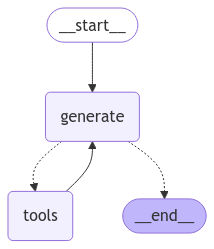

In [10]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [11]:
from langchain_core.messages import AIMessageChunk, HumanMessage

inputs = [HumanMessage(content="지금 서울 몇시야?")]

gathered = None

for msg, metadata in graph.stream({"messages": inputs}, stream_mode="messages"):
    if isinstance(msg, AIMessageChunk):
        print(msg.content, end='')

        if gathered is None:
            gathered = msg
        else:
            gathered = gathered + msg

gathered

지금 서울의 시간은 2025년 2월 27일 00시 33분입니다.

AIMessageChunk(content='지금 서울의 시간은 2025년 2월 27일 00시 33분입니다.', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_IeGsPVRjNm6qD44aAeHk7slv', 'function': {'arguments': '{"timezone":"Asia/Seoul","location":"서울"}', 'name': 'get_current_time'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_callsstop', 'model_name': 'gpt-4o-2024-08-06gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8fp_eb9dce56a8'}, id='run-69e7057c-d726-4523-83ec-89665b43b91a', tool_calls=[{'name': 'get_current_time', 'args': {'timezone': 'Asia/Seoul', 'location': '서울'}, 'id': 'call_IeGsPVRjNm6qD44aAeHk7slv', 'type': 'tool_call'}], tool_call_chunks=[{'name': 'get_current_time', 'args': '{"timezone":"Asia/Seoul","location":"서울"}', 'id': 'call_IeGsPVRjNm6qD44aAeHk7slv', 'index': 0, 'type': 'tool_call_chunk'}])

In [12]:
from langchain_core.messages import AIMessageChunk, SystemMessage

about = "서울월드컵 경기장 잔디 문제"

inputs = [SystemMessage(content=f"""
너는 신문기자이다. 
최근 {about}에 대해 비판하는 심층 분석 기사를 쓰려고 한다.  

- 최근 어떤 이슈가 있는지 검색하고, 사람들이 제일 관심있어 할만한 주제를 선정하고, 왜 선정했는지 말해줘. 
- 그 내용으로 원고를 작성하기 위한 목차를 만들고, 목차 내용을 채우기 위해 추가로 검색할 내용을 리스트로 정리해봐. 
- 검색할 리스트를 토대로 재검색을 한다. 
- 목차에 있는 내용을 작성하기 위해 더 검색이 필요한 정보가 있는지 확인하고, 있다면 추가로 검색해라.
- 검색된 결과에 원하는 정보를 찾지 못했다면 다른 검색어로 재검색해도 좋다. 

더 이상 검색할 내용이 없다면, 조선일보 신문 기사 형식으로 최종 기사를 작성하라.
제목, 부제, 리드문, 본문 의 구성으로 작성하라. 본문 내용은 심층 분석 기사에 맞게 구체적이고 깊이 있게 작성해야 한다. 
    
""")]

for msg, metadata in graph.stream({"messages": inputs}, stream_mode="messages"):
    if isinstance(msg, AIMessageChunk):
        print(msg.content, end='')



-------- WEB SEARCH --------
서울월드컵 경기장 잔디 문제
m
1. snippet: 앞서 서울월드컵경기장 잔디 상태는 지난해 9월 5일 열린 '2026 북중미 월드컵 아시아 지역 3차 예선'에서 팔레스타인과 경기를 치른 후 논란이 된 바 있다. 당시 대표팀 주장 손흥민 선수는 경기를 마친 뒤 취재진을 만나 서울월드컵경기장의 잔디에 문제가 있다고 ..., title: 월드컵경기장 '서울스프링페스타'…'논두렁 잔디' 악몽 막아라 - 사회 | 기사 - 더팩트, link: https://news.tf.co.kr/read/life/2179251.htm
2. snippet: 서울 상암월드컵경기장에서 열릴 것으로 보였던 내달 a매치 2연전을 고양과 수원 경기장에서 치르기로 최근 결정한 것도 잔디 영향이 컸다. 올 시즌엔 평소보다 개막 일정이 당겨지면서 열악한 잔디 상태가 부각되기도 했다., title: 꽁꽁 언 K잔디… 경기력도 얼어붙었다-국민일보, link: https://www.kmib.co.kr/article/view.asp?arcid=1740471547
3. snippet: 앞서 서울월드컵경기장 잔디 상태는 지난해 9월 5일 열린 '2026 북중미 월드컵 아시아 지역 3차 예선'에서 팔레스타인과 경기를 치른 후 논란이 된 바 있다. 당시 대표팀 주장 손흥민 선수는 경기를 마친 뒤 취재진을 만나 서울월드컵경기장의 잔디에 문제가 있다고 ..., title: 월드컵경기장 '서울스프링페스타'…'논두렁 잔디' 악몽 막아라, link: https://v.daum.net/v/20250215000106943
4. snippet: 한눈에 보는 오늘 : 사회 - 뉴스 : 개막식 그라운드석 판매 제외…"잔디 침범 최소화"사진은 지난해 9월 5일 서울 마포구 서울월드컵경기장에서 열린 대한민국과 팔레스타인의 2026 fifa 북중미 월드컵 3차 예선전에서 손흥민이 아쉬워하고 있다. /더팩트 db[더팩트ㅣ정소양 기자] 잔디, title: 월드컵경기장 '서울스프링페스타